<a href="https://colab.research.google.com/github/aryanasadianuoit/Adaptive-Graph-Based-Cohort-Creation-For-Deep-MutualLearning/blob/master/adaptive_graph_for_deep_mutual_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model 1 : 
Initial training
Epoch 1/30
1563/1563 [==============================] - 4s 3ms/step - loss: 3.7058 - accuracy: 0.1346
Epoch 2/30
1563/1563 [==============================] - 4s 3ms/step - loss: 3.0036 - accuracy: 0.2576
Epoch 3/30
1563/1563 [==============================] - 4s 3ms/step - loss: 2.6867 - accuracy: 0.3218
Epoch 4/30
1563/1563 [==============================] - 4s 3ms/step - loss: 2.4703 - accuracy: 0.3638
Epoch 5/30
1563/1563 [==============================] - 4s 3ms/step - loss: 2.2858 - accuracy: 0.4040
Epoch 6/30
1563/1563 [==============================] - 4s 3ms/step - loss: 2.1286 - accuracy: 0.4375
Epoch 7/30
1563/1563 [==============================] - 4s 3ms/step - loss: 1.9868 - accuracy: 0.4685
Epoch 8/30
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8578 - accuracy: 0.4977
Epoch 9/30
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7265 - accuracy: 0.5280
Epoch 10/30
1563/1563 [==============================]

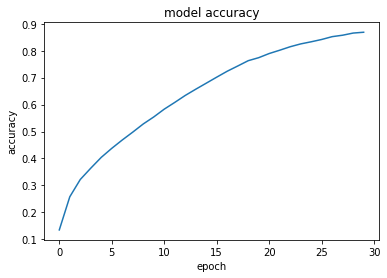

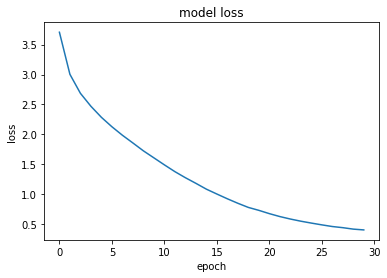

Model 2 : 
Initial training
Epoch 1/30
1563/1563 [==============================] - 4s 3ms/step - loss: 3.6817 - accuracy: 0.1396
Epoch 2/30
1563/1563 [==============================] - 4s 3ms/step - loss: 2.9077 - accuracy: 0.2735
Epoch 3/30
1563/1563 [==============================] - 4s 3ms/step - loss: 2.5620 - accuracy: 0.3465
Epoch 4/30
1563/1563 [==============================] - 4s 3ms/step - loss: 2.3248 - accuracy: 0.3968
Epoch 5/30
1563/1563 [==============================] - 4s 3ms/step - loss: 2.1327 - accuracy: 0.4347
Epoch 6/30
1563/1563 [==============================] - 4s 3ms/step - loss: 1.9605 - accuracy: 0.4764
Epoch 7/30
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7916 - accuracy: 0.5103
Epoch 8/30
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6407 - accuracy: 0.5481
Epoch 9/30
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4902 - accuracy: 0.5814
Epoch 10/30
1563/1563 [==============================]

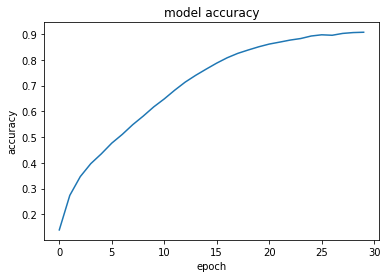

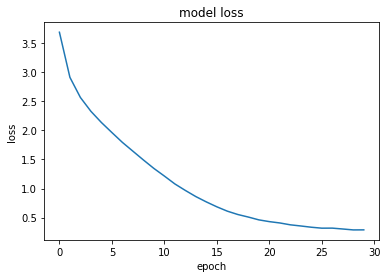

Distillation Training
Epoch 1/30
1563/1563 [==============================] - 5s 3ms/step - loss: 4.2162e-06 - accuracy: 0.5825
Epoch 2/30
1563/1563 [==============================] - 5s 3ms/step - loss: 3.5581e-06 - accuracy: 0.6808
Epoch 3/30
1563/1563 [==============================] - 5s 3ms/step - loss: 3.4766e-06 - accuracy: 0.7492
Epoch 4/30
1563/1563 [==============================] - 5s 3ms/step - loss: 3.4354e-06 - accuracy: 0.7968
Epoch 5/30
1563/1563 [==============================] - 5s 3ms/step - loss: 3.4086e-06 - accuracy: 0.8303
Epoch 6/30
1563/1563 [==============================] - 5s 3ms/step - loss: 3.3913e-06 - accuracy: 0.8543
Epoch 7/30
1563/1563 [==============================] - 5s 3ms/step - loss: 3.3786e-06 - accuracy: 0.8711
Epoch 8/30
1563/1563 [==============================] - 5s 3ms/step - loss: 3.3702e-06 - accuracy: 0.8839
Epoch 9/30
1563/1563 [==============================] - 5s 3ms/step - loss: 3.3632e-06 - accuracy: 0.8959
Epoch 10/30
1563/1563 [=

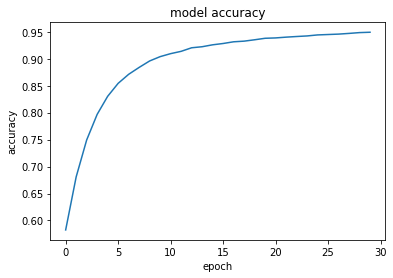

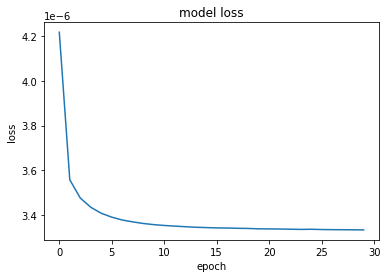

Distillation Training
Epoch 1/30
1563/1563 [==============================] - 5s 3ms/step - loss: 3.6679e-06 - accuracy: 0.7943
Epoch 2/30
1563/1563 [==============================] - 5s 3ms/step - loss: 3.6248e-06 - accuracy: 0.7907
Epoch 3/30
1563/1563 [==============================] - 5s 3ms/step - loss: 3.6062e-06 - accuracy: 0.7826
Epoch 4/30
1563/1563 [==============================] - 5s 3ms/step - loss: 3.5939e-06 - accuracy: 0.7811
Epoch 5/30
1563/1563 [==============================] - 5s 3ms/step - loss: 3.5862e-06 - accuracy: 0.7782
Epoch 6/30
1563/1563 [==============================] - 5s 3ms/step - loss: 3.5813e-06 - accuracy: 0.7734
Epoch 7/30
1126/1563 [====================>.........] - ETA: 1s - loss: 3.5681e-06 - accuracy: 0.7766

KeyboardInterrupt: ignored

In [40]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import theano
from keras import backend
from keras.losses import categorical_crossentropy as logloss
from keras.layers import Lambda, concatenate, Activation
import matplotlib.pyplot as plt
from google.colab import files

cifar100 = keras.datasets.cifar100
(training_images, training_labels), (testing_images, testing_labels) = cifar100.load_data()

temperature = 5

# Reshaping and normalizing the images

training_images = training_images.reshape(50000, 32, 32, 3)
training_images = training_images / 255.0
testing_images = testing_images.reshape(10000, 32, 32, 3)
testing_images = testing_images / 255.0

cohort_list = []


def train_basic():
    print("Initial training")
    basic_model = keras.models.Sequential([keras.layers.Conv2D(filters=32, kernel_size=(3, 3),
                                                               activation=keras.activations.relu,
                                                               input_shape=(32, 32, 3)),
                                           keras.layers.MaxPool2D(2, 2),
                                           keras.layers.Conv2D(filters=64, kernel_size=(3, 3),
                                                               activation=keras.activations.relu),
                                           keras.layers.MaxPool2D(2, 2),
                                           keras.layers.Flatten(),
                                           keras.layers.Dense(units=256, activation=keras.activations.relu),
                                           keras.layers.Dense(units=100, activation=keras.activations.relu),
                                           keras.layers.Dense(units=100, activation=keras.activations.softmax)])
    #basic_model.summary()
    basic_model.compile(optimizer=keras.optimizers.Adam(),
                        loss=keras.losses.sparse_categorical_crossentropy,
                        metrics=["accuracy"])
    history = basic_model.fit(x=training_images, y=training_labels, epochs=30, verbose=1)
    print(history.history.keys())
    basic_model.evaluate(x=testing_images, y= testing_labels)
    #Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.show()
    #plt.savefig('basicacc.png')
    #files.download("/Users/aryanasadian/Desktop/basicacc.png")
    # summarize history for loss
    plt.plot(history.history['loss'])
    #plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.show()  
    #plt.savefig('basicloss.png')
    #files.download("basicloss.png")

    return basic_model


def get_logits(basic_model):
    intermediate_input = basic_model.input
    intermediate_output = basic_model.get_layer(index=-2).output
    intermediate_layer_model = keras.models.Model(inputs=intermediate_input, outputs=intermediate_output)
    intermediate_output = intermediate_layer_model.predict(x=training_images)
    return np.array(intermediate_output)


def get_probabilities(basic_model):
    softmax_layer = keras.models.Model(inputs=basic_model.input,
                                       outputs=basic_model.get_layer(index=-1).output)
    probabilities = softmax_layer.predict(x=training_images)
    return np.array(probabilities)


def get_high_temp_probabilities(basic_model):
    intermediate_layer_model = keras.models.Model(inputs=basic_model.input,
                                                  outputs=basic_model.get_layer(index=-1).output)
    intermediate_output = intermediate_layer_model.predict(x=training_images)
    intermediate_output = np.array(intermediate_output) ** (1 / temperature)
    p_sum = intermediate_output.sum()
    sample_temp = intermediate_output / p_sum
    return sample_temp


def deep_mutual_training():
    for node in cohort_list:
        for other_nodes in range(0, len(cohort_list)):
            if node is cohort_list[other_nodes]:
                print("Same student")

            else:
               # print("Before reshape : ", np.shape(get_high_temp_probabilities(cohort_list[other_nodes])),"   ",np.shape(get_high_temp_probabilities(node)))
                truth = np.reshape(get_high_temp_probabilities(cohort_list[other_nodes]), newshape=-1)
                preds = np.reshape(get_high_temp_probabilities(node), newshape=-1)

               # print("After reshape : ", np.shape(truth),"   ",np.shape(preds))
               # print("Shapes input : ",np.shape(training_images),"  Shape of Labels : ",np.shape(training_labels))

                node.compile(optimizer=keras.optimizers.Adam(),
                             loss=lambda truth, preds: knowledge_distillation_loss(truth, preds),
                             metrics=['accuracy'])
                print("Distillation Training")
                history_1 = node.fit(x=training_images, y=get_high_temp_probabilities(cohort_list[other_nodes]),
                         epochs=30, verbose=1)
                plt.plot(history_1.history['accuracy'])
                plt.title('model accuracy')
                plt.ylabel('accuracy')
                plt.xlabel('epoch')
                #plt.legend(['train', 'test'], loc='upper left')
                plt.show()
                # summarize history for loss
                plt.plot(history_1.history['loss'])
                #plt.plot(history.history['loss'])
                plt.title('model loss')
                plt.ylabel('loss')
                plt.xlabel('epoch')
                #plt.legend(['train', 'test'], loc='upper left')
                plt.show() 


def deep_mutual_training2():
    for node in cohort_list:
        for other_nodes in range(0, len(cohort_list)):

          # print("Before reshape : ", np.shape(get_high_temp_probabilities(cohort_list[other_nodes])),"   ",np.shape(get_high_temp_probabilities(node)))
          truth = np.reshape(get_high_temp_probabilities(cohort_list[other_nodes]), newshape=-1)
          preds = np.reshape(get_high_temp_probabilities(node), newshape=-1)
          node.compile(optimizer=keras.optimizers.Adam(),
                       loss=lambda truth, preds: knowledge_distillation_loss(truth, preds),
                      metrics=['accuracy'])
          print("Distillation Training")
          history_1 = node.fit(x=training_images, y=get_high_temp_probabilities(cohort_list[other_nodes]),
                               epochs=30, verbose=1)
          plt.plot(history_1.history['accuracy'])
          plt.title('model accuracy')
          plt.ylabel('accuracy')
          plt.xlabel('epoch')
          plt.show()
          #plt.savefig('distilledacc.png')
          #files.download("distilledacc.png")
          #summarize history for loss
          plt.plot(history_1.history['loss'])
          plt.title('model loss')
          plt.ylabel('loss')
          plt.xlabel('epoch')
          plt.show() 
          #plt.savefig('distilled.png')
          #files.download("distilled.png")
        
          


def knowledge_distillation_loss(y_true, y_pred):    
    
    # split in 
    #    onehot hard true targets
    #    logits from xception
    y_true, logits = y_true[:, :100], y_true[:, 100:]
    
    # convert logits to soft targets
    y_soft = backend.softmax(logits/temperature)
    
    # split in 
    #    usual output probabilities
    #    probabilities made softer with temperature
    y_pred, y_pred_soft = y_pred[:, :100], y_pred[:, 100:]    
    
    return 1/20*logloss(y_true, y_pred) + logloss(y_soft, y_pred_soft)
    #return logloss(y_soft, y_pred_soft)

print("Model 1 : ")
cohort_list.append(train_basic())
print("Model 2 : ")
cohort_list.append(train_basic())

#for node in cohort_list:
    #print("Node : ", node)
    #print(get_logits(node))
    #print("********************************")
    #print(get_probabilities(node))
    #print("********************************")
    #print(get_high_temp_probabilities(node))
    #print("###############################\n\n")

#deep_mutual_training()
deep_mutual_training2()

